# 1. Company profit prediction

Source: https://youtu.be/NUXdtN1W1FE <br>
Dataset: https://www.kaggle.com/munagalavijayakumar/profit-prediction

## a. Import the libraries

In [1]:
import pandas as pd       # Read csv file
import numpy as np        # ML model requires np arrays

import matplotlib.pyplot as plt     # Seaborn requires matplotlib
import seaborn as sns               # Data visualization

## b. Import the dataset

In [2]:
df = pd.read_csv('./data/1000_Companies.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
X[:5, :]

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida']], dtype=object)

In [5]:
y[:5]

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94])

In [6]:
column_names = df.columns
display(column_names)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

## c. Visualize data

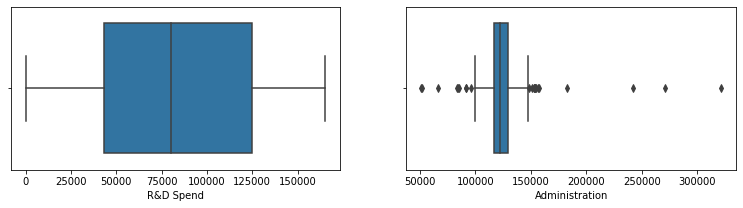

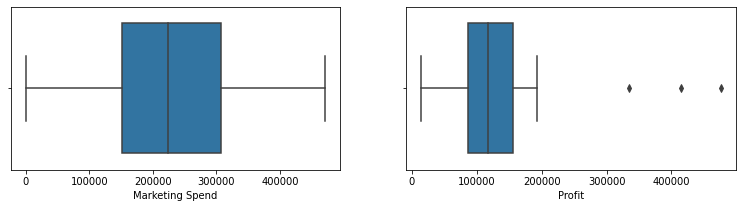

In [30]:
num_cols = ['R&D Spend','Administration','Marketing Spend','Profit']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1

    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

1.   R&D Spend is normally-distributed <br>
==> No need to transform, only need to scale to unit-size <br><br>
2.   Marketing Spend is normally-distributed <br>
==> No need to transform, only need to scale to unit-size <br><br>
3.   Administration is is normally-distributed <br>
==> No need to transform, only need to scale to unit-size <br><br>
4.   Profit is skewed ==> Needs transformation

<AxesSubplot:xlabel='State', ylabel='count'>

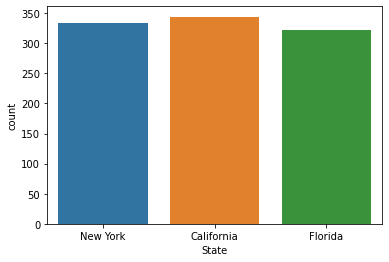

In [8]:
sns.countplot(x='State', data=df)

<AxesSubplot:>

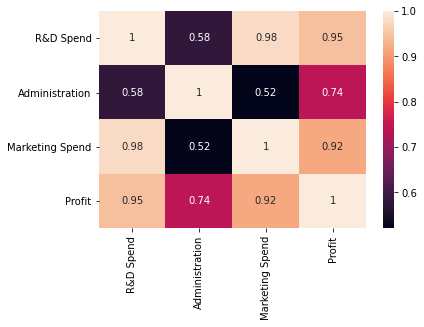

In [9]:
# Data Visualization
# Building correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)

Correlation between variables are high. <br>
We will need to analyze the VIF and drop some variables.

## d. Visualize relationships

Text(-14.950000000000003, 0.5, 'Profit')

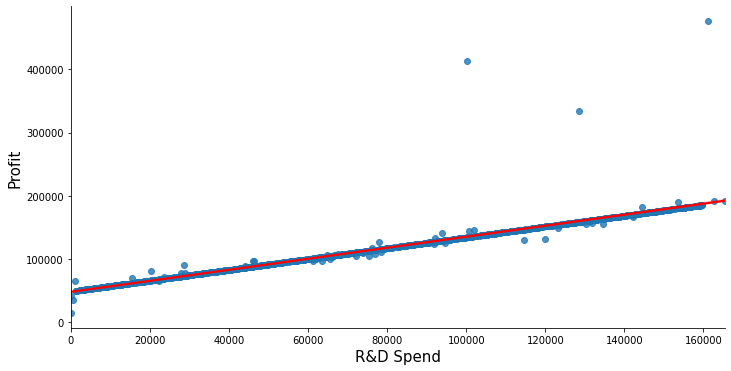

In [10]:
# Plot R&D Spend against Profit
sns.lmplot(x='R&D Spend', y='Profit', data=df, aspect = 2, line_kws={'color': 'red'})
plt.xlabel('R&D Spend', fontsize=15)
plt.ylabel('Profit', fontsize=15)

R&D is clearly linearly-related to Profit.

Text(-14.950000000000003, 0.5, 'Profit')

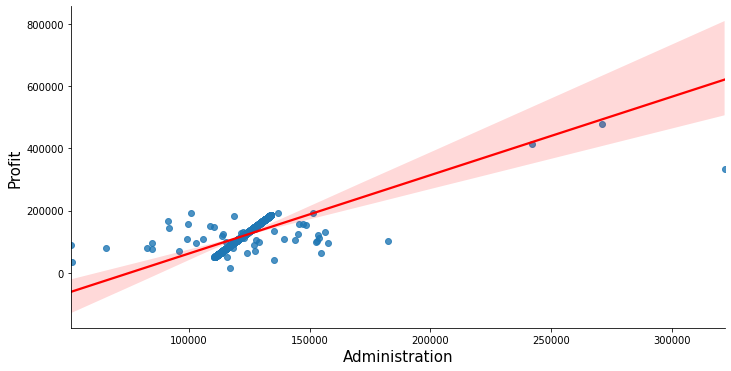

In [11]:
# Plot Administration against Profit
sns.lmplot(x='Administration', y='Profit', data=df, aspect = 2, line_kws={'color': 'red'})
plt.xlabel('Administration', fontsize=15)
plt.ylabel('Profit', fontsize=15)

Administration is also linearly related to Profit.<br>
However, there are a significant number of anomalies.

Text(-14.950000000000003, 0.5, 'Profit')

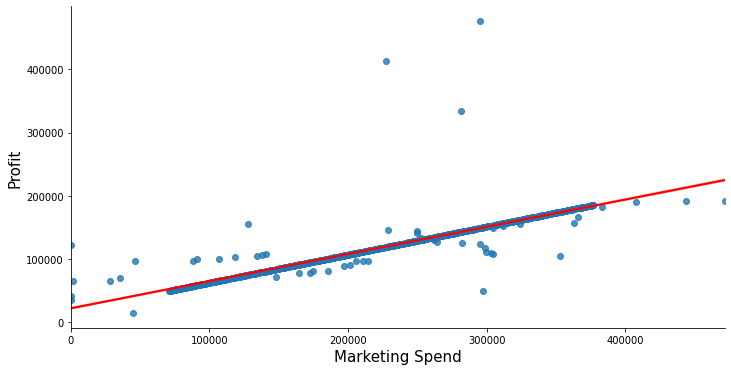

In [12]:
# Plot Marketing Spend against Profit
sns.lmplot(x='Marketing Spend', y='Profit', data=df, aspect = 2, line_kws={'color': 'red'})
plt.xlabel('Marketing Spend', fontsize=15)
plt.ylabel('Profit', fontsize=15)

Marketing Spend is clearly linearly related to Profit.<br>

## e. Identify the best transformation

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Profit (Boxcox)')

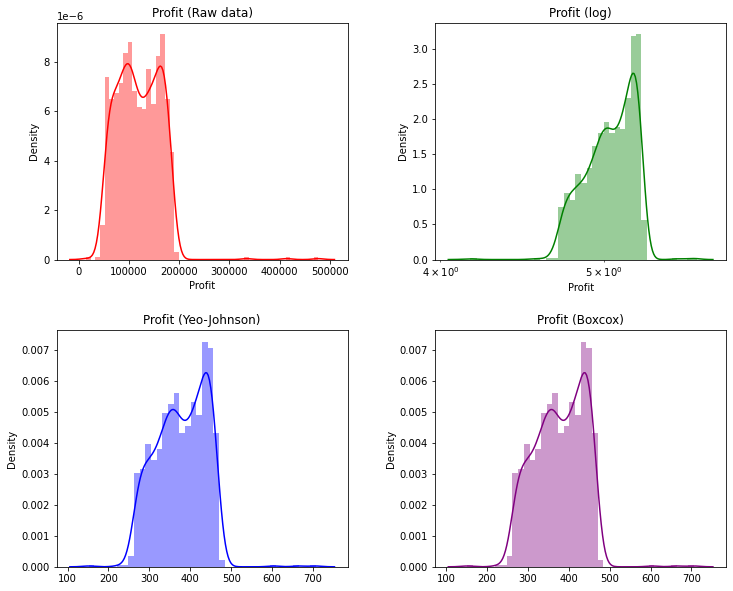

In [13]:
f= plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# Raw data
ax=f.add_subplot(2,2,1)
sns.distplot(df['Profit'],bins=50,color='red',ax=ax)
ax.set_title('Profit (Raw data)')

# Log transform
ax=f.add_subplot(2,2,2)
sns.distplot(np.log10(df['Profit']),bins=40,color='green',ax=ax)
ax.set_title('Profit (log)')
ax.set_xscale('log');

# Yeo-Johnson transform
from scipy import stats
profit, _ = stats.yeojohnson(df['Profit'])

ax=f.add_subplot(2,2,3)
sns.distplot(profit,bins=40,color='blue',ax=ax)
ax.set_title('Profit (Yeo-Johnson)')

# BoxCox transform
from scipy import stats
profit, _ = stats.boxcox(df['Profit'])

ax=f.add_subplot(2,2,4)
sns.distplot(profit,bins=40,color='purple',ax=ax)
ax.set_title('Profit (Boxcox)')

It seems even though our Profit data is skewed, any transformation will just worsen the skew
==> Use raw data

## f. Perform data pre-processing

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X_preprocessor = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('numerical', StandardScaler(), [0, 1, 2]),
        ('categorical', OneHotEncoder(drop='first'), [3])
    ]
)

In [16]:
X_train_encoded = np.array(X_preprocessor.fit_transform(X_train))
X_test_encoded = np.array(X_preprocessor.transform(X_test))

display(X_train_encoded[:5, :])

array([[ 1.14299433,  0.547713  ,  1.1206731 ,  0.        ,  0.        ],
       [-0.55700625, -0.34505277, -0.53952308,  0.        ,  1.        ],
       [ 1.66826251,  0.82356083,  1.63364248,  0.        ,  1.        ],
       [-0.29183975, -0.20579895, -0.28056529,  0.        ,  1.        ],
       [-0.69884251, -0.41953896, -0.67803834,  1.        ,  0.        ]])

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_encoded
vif['Features'] = column_names
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
0,R&D Spend,27.08
2,Marketing Spend,24.83
1,Administration,1.56
3,State,1.00
4,Profit,1.00


Since R&D Spend has the highest VIF that is >5, we drop it.

In [18]:
# Drop the column
column_names = column_names.drop('R&D Spend', errors='ignore')
X_train_encoded = np.delete(X_train_encoded, 0, axis=1)
X_test_encoded = np.delete(X_test_encoded, 0, axis=1)

# Test for VIF again
vif = pd.DataFrame()
X = X_train_encoded
vif['Features'] = column_names
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
1,Marketing Spend,1.32
0,Administration,1.31
2,State,1.00
3,Profit,1.00


All VIF < 5, we can proceed to the next step.

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X_preprocessor = ColumnTransformer(
    remainder='drop',
    transformers=[
        ('numerical', StandardScaler(), [1, 2]),
        ('categorical', OneHotEncoder(drop='first'), [3])
    ]
)

X_preprocessor.fit_transform(X_train)

array([[ 0.547713  ,  1.1206731 ,  0.        ,  0.        ],
       [-0.34505277, -0.53952308,  0.        ,  1.        ],
       [ 0.82356083,  1.63364248,  0.        ,  1.        ],
       ...,
       [ 0.47619353,  0.98767478,  0.        ,  1.        ],
       [-0.35097484, -0.55053582,  0.        ,  0.        ],
       [-0.29462995, -0.44575631,  0.        ,  0.        ]])

## g. Build the model

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_encoded, y_train)

LinearRegression()

In [21]:
# Print out the coefficient & the intercept
print(f"Coefficient = {regressor.coef_}")
print(f"Intercept = {regressor.intercept_}")

Coefficient = [17369.1613911  30617.84120176  -331.07194046   537.45612503]
Intercept = 120114.47996566455


## h. Evaluate the model

In [22]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

CV = []
R2_train = []
R2_test = []
        
# R2 score of train set
y_pred_train = regressor.predict(X_train_encoded)
R2_train_model = r2_score(y_train,y_pred_train)
R2_train.append(round(R2_train_model,2))

# R2 score of test set
y_pred_test = regressor.predict(X_test_encoded)
R2_test_model = r2_score(y_test,y_pred_test)
R2_test.append(round(R2_test_model,2))

# R2 mean of train set using Cross validation
ten_percent_data = int(df.shape[0]*0.1)
cross_val = cross_val_score(regressor, X_train_encoded, y_train, cv=ten_percent_data)
cv_mean = cross_val.mean()
CV.append(round(cv_mean,2))

# Printing results
print(f"Train R2-score = {round(R2_train_model,4) * 100}%")
print(f"Train CV mean = {round(cv_mean,4) * 100}%")
print(f"Test R2-score = {round(R2_test_model,4) * 100}%")

Train R2-score = 93.62%
Train CV mean = 93.43%
Test R2-score = 93.7%


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


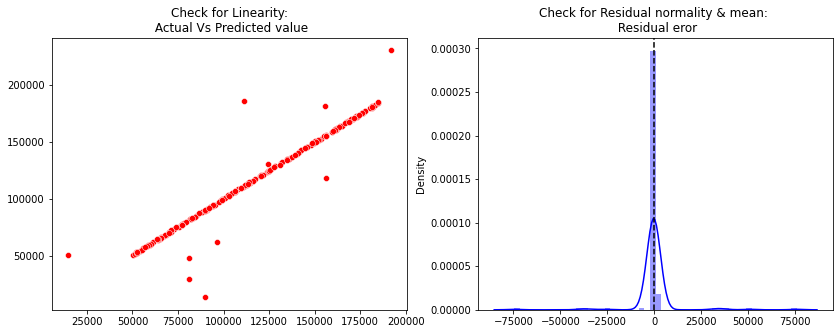

In [23]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_test,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_test),ax=ax,color='b')
ax.axvline((y_test - y_pred_test).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

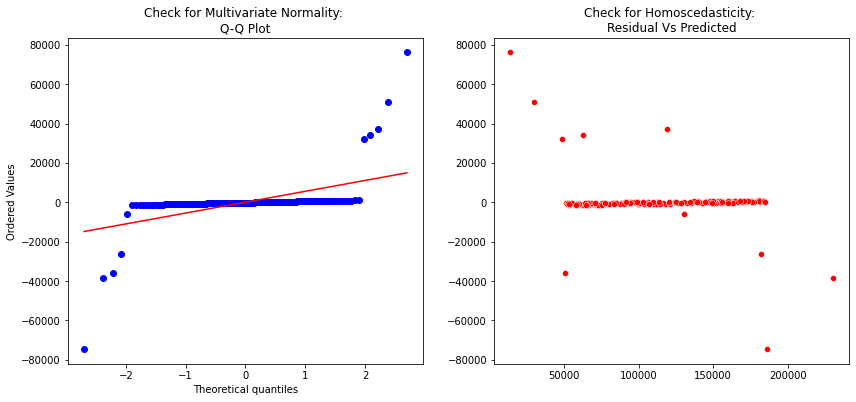

In [24]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_test),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_test), x= y_pred_test, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

## Predict

In [25]:
data = [
    [200000.0, 200000.0, 200000.0, 'New York'],
    [600000.0, 0.0, 0.0, 'California'],
    [0.0, 600000.0, 0.0, 'Florida'],
    [0.0, 0.0, 600000.0, 'New York']
]

In [26]:
data_processed = X_preprocessor.transform(data)
y_pred = regressor.predict(data_processed)

display(y_pred)

array([ 214197.76960547, -120791.2756159 ,  680981.49971734,
         80997.10052445])